In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def detect_lines_custom(self, image):
    """
    TASK 3: Line detection using RANSAC
    """
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(image_gray, (5, 5), 1.5)
    max_intensity = np.max(blurred)
    threshold = max_intensity * 0.9
    _, threshold_image = cv2.threshold(blurred, threshold, 255, cv2.THRESH_BINARY)

    # use derivative of gaussian to detect edges
    dog_filter_x = cv2.Sobel(threshold_image, cv2.CV_64F, 1, 0, ksize=5)
    dog_filter_y = cv2.Sobel(threshold_image, cv2.CV_64F, 0, 1, ksize=5)
    dog_magnitude = cv2.magnitude(dog_filter_x, dog_filter_y)
    _, dog_edges = cv2.threshold(dog_magnitude, 50, 255, cv2.THRESH_BINARY)
    dog_edges = dog_edges.astype('uint8')

    lines = cv2.HoughLinesP(dog_edges, 1, np.pi / 180, threshold=100, minLineLength=50, maxLineGap=10)

    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        
    return image

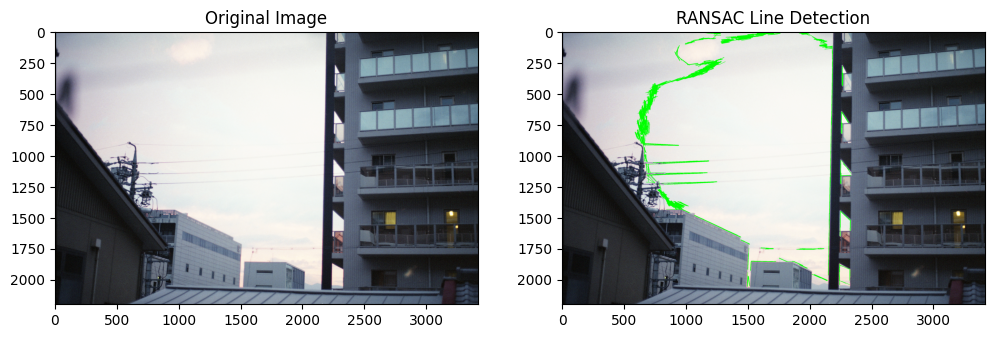

In [48]:
image = cv2.imread('024.jpg')
image_original = image.copy()

result_image = detect_lines_ransac(None, image)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.title("RANSAC Line Detection")
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))